# Machine Failure

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [3]:
from utils import *

### Step 1 - Data Ingestion

In [4]:
import pandas as pd

df = pd.read_csv("train_machine.csv")
df.head()

,id,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


Target Feature - Machine Failure
1. 0 --> Working
2. 1 --> Failed

In [5]:
df["Machine failure"].unique()

array([0, 1])

In [6]:
a = df["Machine failure"].value_counts()
a

Machine failure
0    134281
1      2148
Name: count, dtype: int64

<Axes: title={'center': 'Machine Failure Distribution'}, xlabel='Machine Failure', ylabel='Count'>

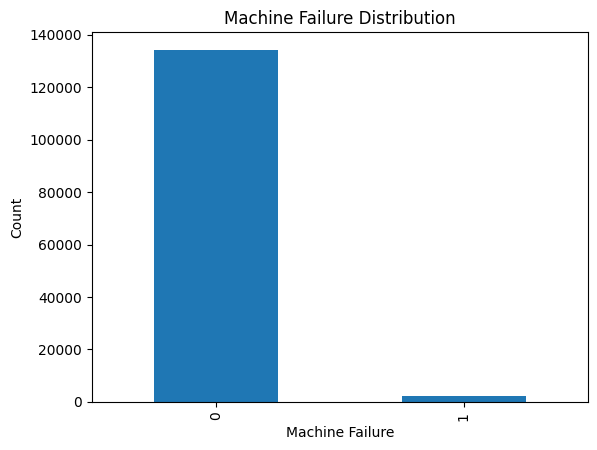

In [7]:
a.plot(
    kind="bar",
    title="Machine Failure Distribution",
    xlabel="Machine Failure",
    ylabel="Count",
)

### Step 2 - Data Quality Checks

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   136429 non-null  int64  
 1   Product ID           136429 non-null  object 
 2   Type                 136429 non-null  object 
 3   Air temperature      136429 non-null  float64
 4   Process temperature  136429 non-null  float64
 5   Rotational speed     136429 non-null  int64  
 6   Torque               136429 non-null  float64
 7   Tool wear            136429 non-null  int64  
 8   Machine failure      136429 non-null  int64  
 9   TWF                  136429 non-null  int64  
 10  HDF                  136429 non-null  int64  
 11  PWF                  136429 non-null  int64  
 12  OSF                  136429 non-null  int64  
 13  RNF                  136429 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 14.6+ MB


In [9]:
m = df.isna().sum()
m

id                     0
Product ID             0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Machine failure        0
TWF                    0
HDF                    0
PWF                    0
OSF                    0
RNF                    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Separate X & Y(Target Feature)

In [11]:
X = df.drop(columns=["id", "Machine failure", "Product ID"])
Y = df["Machine failure"]

In [12]:
X.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [13]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

### Step 4 - Preprocessing on X

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Type                 136429 non-null  object 
 1   Air temperature      136429 non-null  float64
 2   Process temperature  136429 non-null  float64
 3   Rotational speed     136429 non-null  int64  
 4   Torque               136429 non-null  float64
 5   Tool wear            136429 non-null  int64  
 6   TWF                  136429 non-null  int64  
 7   HDF                  136429 non-null  int64  
 8   PWF                  136429 non-null  int64  
 9   OSF                  136429 non-null  int64  
 10  RNF                  136429 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 11.4+ MB


In [15]:
from utils import preprocess_data

In [16]:
X_pre, pre = preprocess_data(X)
X_pre.head()

,num__Air temperature,num__Process temperature,num__Rotational speed,num__Torque,num__Tool wear,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0


In [17]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature', 'Process temperature',
                                  'Rotational speed', 'Torque', 'Tool wear',
                                  'TWF', 'HDF', 'PWF', 'OSF', 'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

### Step 5 - Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=42
)

In [19]:
xtrain.head()

,num__Air temperature,num__Process temperature,num__Rotational speed,num__Torque,num__Tool wear,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
12407,0.879169,0.547897,-0.283496,0.394175,-0.428500,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
85011,0.449579,-0.318424,-0.492526,0.358890,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
65292,-0.731794,-0.607197,-1.119615,1.958477,-1.210180,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
18478,0.932868,0.547897,0.163396,-0.993701,-1.382149,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
100267,-0.516999,-0.968164,0.812109,-0.876084,0.306279,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0


In [20]:
xtest.head()

,num__Air temperature,num__Process temperature,num__Rotational speed,num__Torque,num__Tool wear,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
123128,0.556977,0.547897,-1.097992,2.546560,-1.444684,-0.03945,-0.072021,-0.049016,15.863363,-0.047568,1.0,0.0
54705,0.342182,0.981058,0.163396,-0.511473,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
40016,0.395880,0.331317,-0.153753,-0.217431,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
75025,-1.215083,-1.112551,-0.132129,-0.217431,0.400081,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
120421,0.503278,0.547897,0.134564,-0.217431,1.541334,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0


In [21]:
ytrain.head()

12407     0
85011     0
65292     0
18478     0
100267    0
Name: Machine failure, dtype: int64

In [22]:
ytest.head()

123128    1
54705     0
40016     0
75025     0
120421    0
Name: Machine failure, dtype: int64

In [23]:
xtest.shape, xtrain.shape, ytest.shape, ytrain.shape

((27286, 12), (109143, 12), (27286,), (109143,))

### Step 6 - Model Selection

In [24]:
! uv add xgboost

Resolved 56 packages in 1ms
Audited 49 packages in 0.03ms


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
import xgboost as xgb

In [26]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    HistGradientBoostingClassifier(),
    xgb.XGBClassifier(),
]

In [27]:
from utils import algorithm_evaluation

In [28]:
best_model, res_df = algorithm_evaluation(
    models,
    xtrain,
    ytrain,
    xtest,
    ytest,
)

{'model_name': 'LogisticRegression', 'model': LogisticRegression(), 'f1_train': 0.9303, 'f1_test': 0.9315, 'f1_cv': np.float64(0.9301)}


{'model_name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(), 'f1_train': 0.9975, 'f1_test': 0.88, 'f1_cv': np.float64(0.8718)}


{'model_name': 'RandomForestClassifier', 'model': RandomForestClassifier(), 'f1_train': 0.997, 'f1_test': 0.932, 'f1_cv': np.float64(0.927)}


{'model_name': 'HistGradientBoostingClassifier', 'model': HistGradientBoostingClassifier(), 'f1_train': 0.9321, 'f1_test': 0.9298, 'f1_cv': np.float64(0.9282)}


{'model_name': 'XGBClassifier', 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_typ

In [30]:
best_model

LogisticRegression()

In [31]:
res_df

,model_name,model,f1_train,f1_test,f1_cv
0,LogisticRegression,LogisticRegression(),0.9303,0.9315,0.9301
1,HistGradientBoostingClassifier,HistGradientBoostingClassifier(),0.9321,0.9298,0.9282
2,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.9561,0.9292,0.9275
3,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.9970,0.9320,0.9270
4,DecisionTreeClassifier,DecisionTreeClassifier(),0.9975,0.8800,0.8718


### Step 7 - Model Evaluation

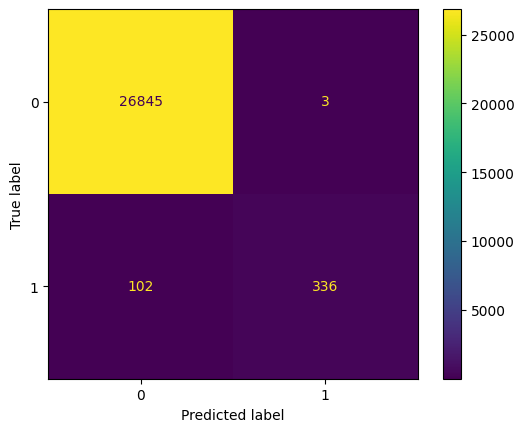

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

In [33]:
ypred_test = best_model.predict(xtest)

In [34]:
ypred_test[0:5]

array([1, 0, 0, 0, 0])

In [35]:
ytest.head()

123128    1
54705     0
40016     0
75025     0
120421    0
Name: Machine failure, dtype: int64

In [36]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



### Step 8 - Out of Sample Prediction

In [41]:
xnew = pd.read_csv("test_machine.csv")
xnew.head()

,id,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [42]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature', 'Process temperature',
                                  'Rotational speed', 'Torque', 'Tool wear',
                                  'TWF', 'HDF', 'PWF', 'OSF', 'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [43]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Air temperature,num__Process temperature,num__Rotational speed,num__Torque,num__Tool wear,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0


In [44]:
preds = best_model.predict(xnew_pre)
preds[0:5]

array([0, 0, 0, 0, 0])

In [45]:
best_model.classes_

array([0, 1])

In [46]:
probs = best_model.predict_proba(xnew_pre)[:, 1]
probs

array([0.0020923 , 0.00103873, 0.00271455, ..., 0.00313573, 0.00253279,
       0.00213042], shape=(90954,))

In [47]:
res = xnew[["id"]]
res["Machine_Failure"] = preds
res["Failure_Probability"] = probs.round(4)

In [48]:
res

,id,Machine_Failure,Failure_Probability
0,136429,0,0.0021
1,136430,0,0.0010
2,136431,0,0.0027
3,136432,0,0.0032
4,136433,0,0.0038
...,...,...,...
90949,227378,0,0.0022
90950,227379,0,0.0004
90951,227380,0,0.0031
90952,227381,0,0.0025


In [50]:
b = res["Machine_Failure"].value_counts()
b

Machine_Failure
0    89848
1     1106
Name: count, dtype: int64

<Axes: xlabel='Machine_Failure'>

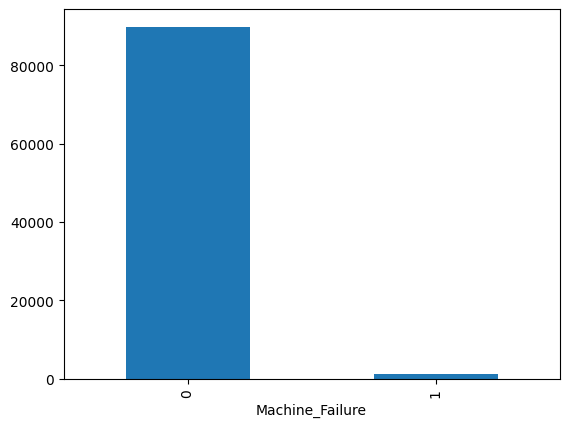

In [51]:
b.plot(kind="bar")

In [52]:
res.to_csv("Machine_Failure.csv", index=False)

### Step 9 - Save and Load

In [53]:
import joblib

joblib.dump(pre, "pre.joblib")
joblib.dump(best_model, "model.joblib")

['model.joblib']

In [54]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature', 'Process temperature',
                                  'Rotational speed', 'Torque', 'Tool wear',
                                  'TWF', 'HDF', 'PWF', 'OSF', 'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [56]:
m = joblib.load("model.joblib")
m

LogisticRegression()

In [57]:
m.score(xtrain, ytrain), m.score(xtest, ytest)

(0.9961884866642845, 0.9961518727552591)